# Project: Investigate a Dataset of Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset provided for this analysis is a collection of about 10,000 movies collected from the IMDb database and contains some information about each movie

> Some questions that will be explored over the course of this report are:
> 1. What is the correlation between movie budgets and revenues
> 2. What are the most popular movies in the dataset?
> 3. Have the number of movies being made increased over the years?

In [1]:
#Importing packages that will be used to explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
#Loading the data from the csv file and looking at the first few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Check the data types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
sum(df.duplicated())

1

> There are 9 columns with null data types and there is 1 duplicated row. Some of the data types do not appear to be consistent with their description and should be changed during the data cleaning process

### Data Cleaning 
> 1. The ID, IMDB ID, cast, homepage, tagline, keywords, overview, production companies, release_date columns do not seem to be useful so they will be dropped from the dataset

In [8]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis = 1, inplace = True)


In [9]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#Drop Director column as well
df.drop(['director'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [12]:
#Change the adjusted budget and revenue columns to type int
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)
df['popularity'] = df['popularity'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null int64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null int64
revenue_adj       10866 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 933.9+ KB


In [19]:
#Drop Budget and Revenue because Adjusted Revenue and Adjusted Budget are better to use for comparisons

In [13]:
df.drop(['budget', 'revenue'], axis = 1, inplace = True)

In [14]:
#Drop rows with null values
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null int64
revenue_adj       10843 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 847.1+ KB


In [15]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)


In [16]:
#Put Years into bins to group them
bin_edges = [1961, 1969, 1979, 1989, 1999, 2009, 2019]
bin_names = ["1960's", "1970's", "1980's", "1990's", "2000's", "2010's"]
df['Decades'] = pd.cut(df['release_year'], bin_edges, labels = bin_names)

In [23]:
df['Decades'].isnull().sum()

63

In [51]:
#Drop null values, they will not have a big impact on the dataset
df.dropna(axis = 0, inplace = True)

In [52]:
#Confirm null values have been dropped
df['Decades'].isnull().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is the relationship between movie budgets and their revenues)

In [26]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000,1.077900e+04,1.077900e+04
mean,0.278319,102.063457,218.643473,5.971871,2001.553391,1.764360e+07,5.145111e+07
std,0.956904,31.281984,577.569423,0.934683,12.463910,3.440501e+07,1.443133e+08
min,0.000000,0.000000,10.000000,1.500000,1962.000000,0.000000e+00,0.000000e+00
25%,0.000000,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.000000,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.000000,111.000000,146.500000,6.600000,2011.000000,2.096461e+07,3.389248e+07
max,32.000000,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


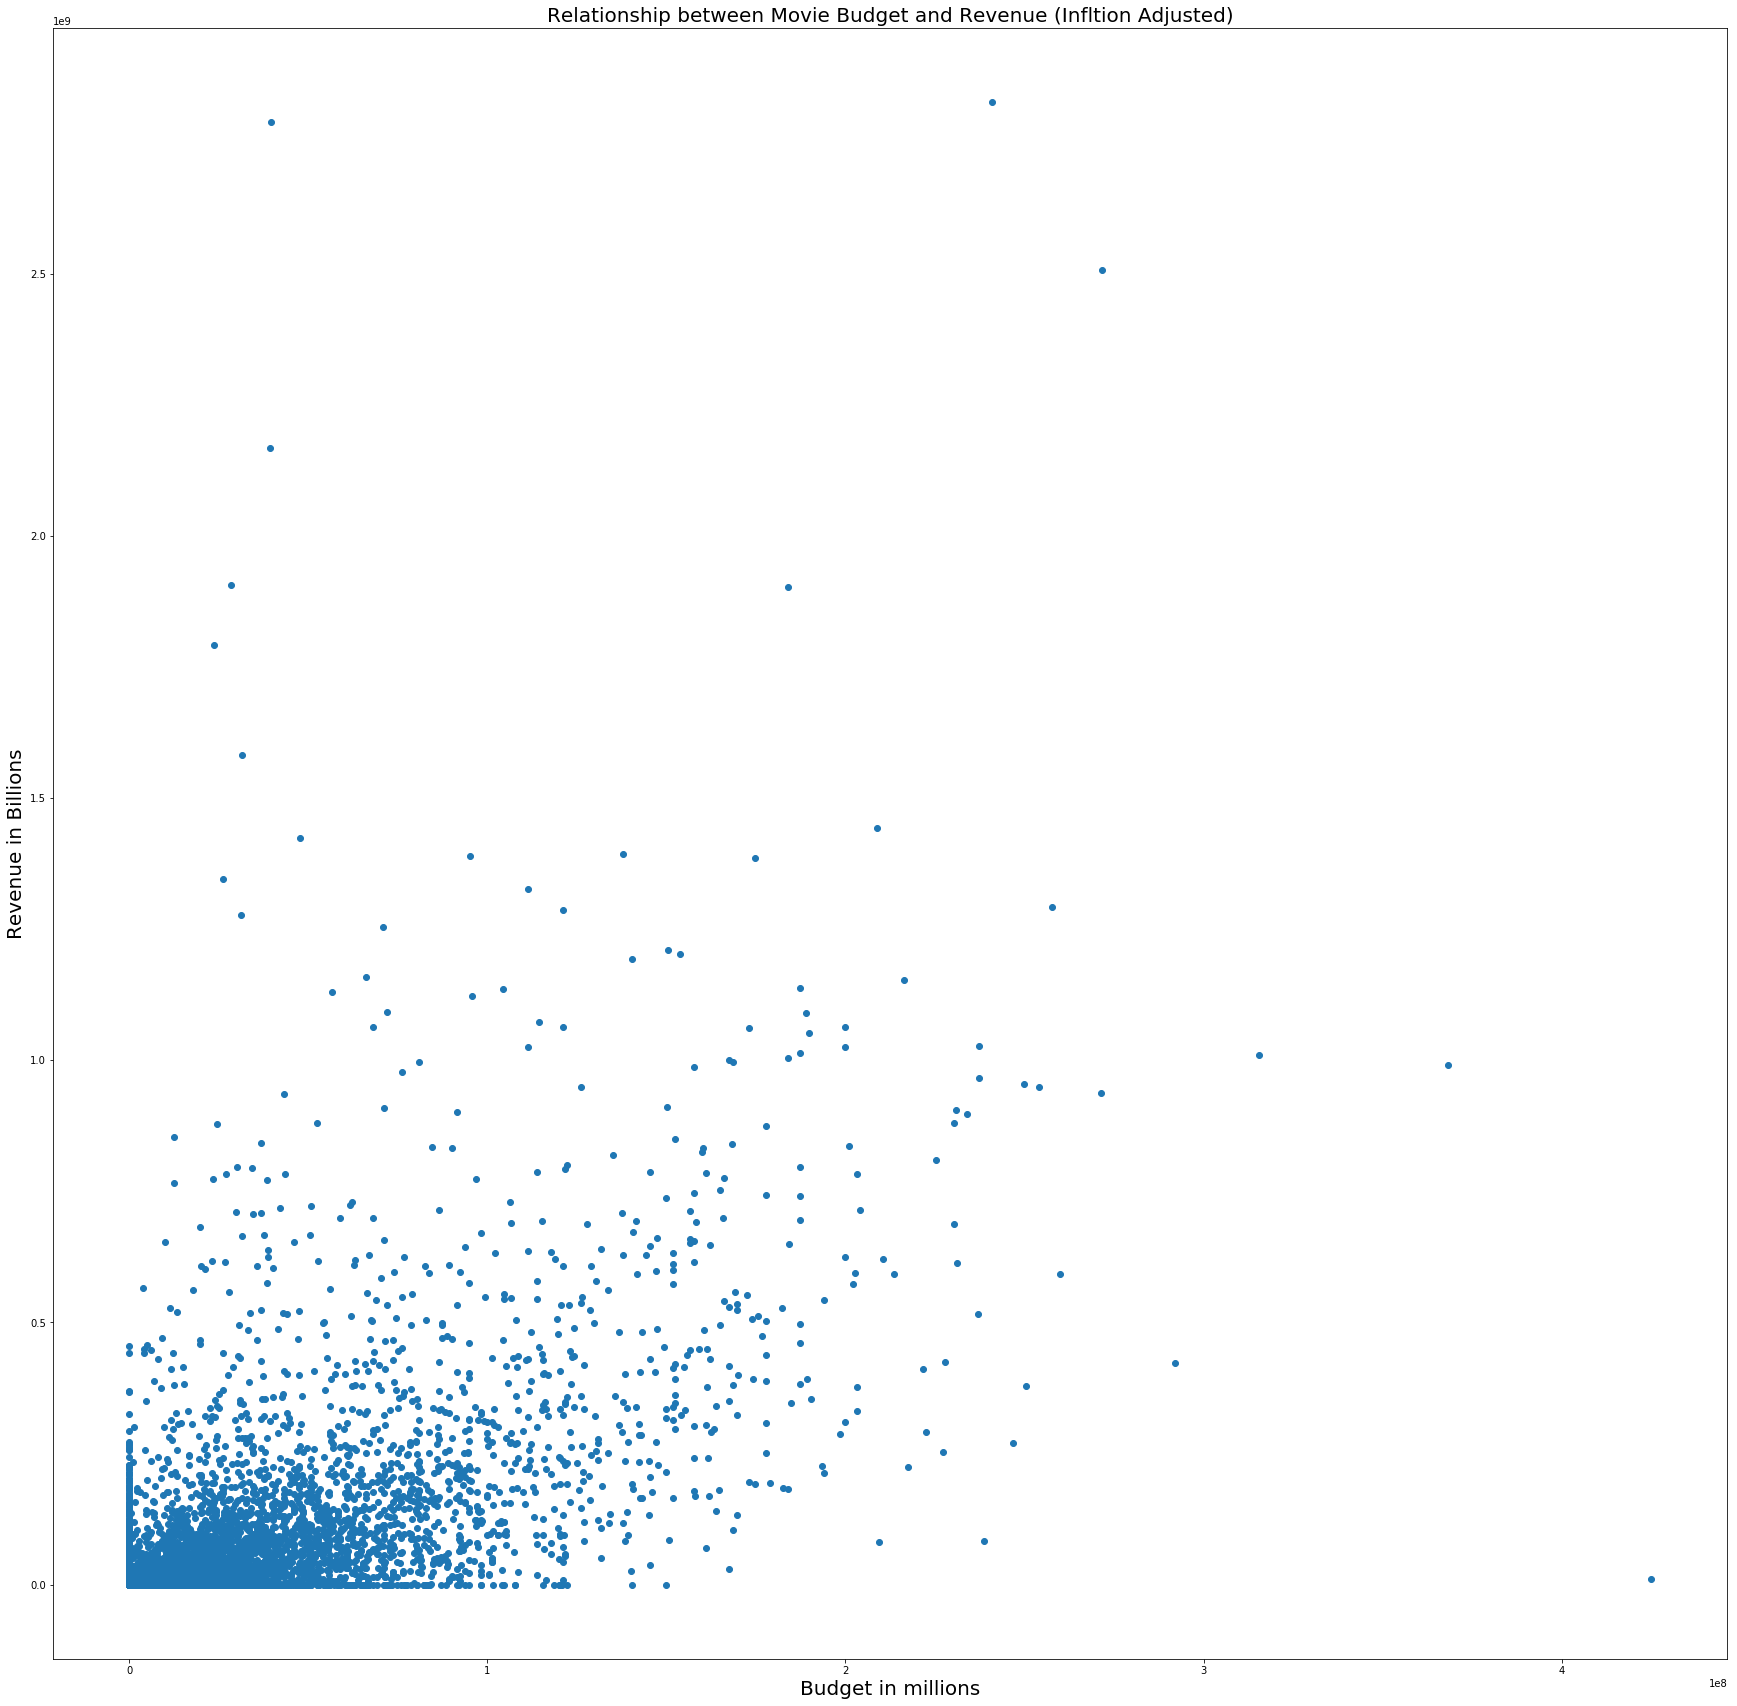

In [27]:
#Create a scatterplot of the relationship between budget and revenue
plt.figure(figsize=(30, 30))
plt.scatter(df['budget_adj'], df['revenue_adj'])
plt.title('Relationship between Movie Budget and Revenue (Infltion Adjusted)', fontsize = 20);
plt.xlabel('Budget in millions', fontsize=20);
plt.ylabel('Revenue in Billions', fontsize=20);

> From the figure above, the revenue is positively correlated to the movie budget. That means movie revenues have increased as movie budgets increased


### Research Question 2  (What are the most popular movies?)

In [28]:
#Select the 5 most popular movies
df_q = df.query('popularity > 12')
df_q

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,Decades
0,32,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445892,2010's
1,28,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292,2010's
2,13,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955,271619025,2010's
629,24,Interstellar,169,Adventure|Drama|Science Fiction,6498,8.0,2014,151980023,572690645,2010's
630,14,Guardians of the Galaxy,121,Action|Science Fiction|Adventure,5612,7.9,2014,156585478,712291130,2010's


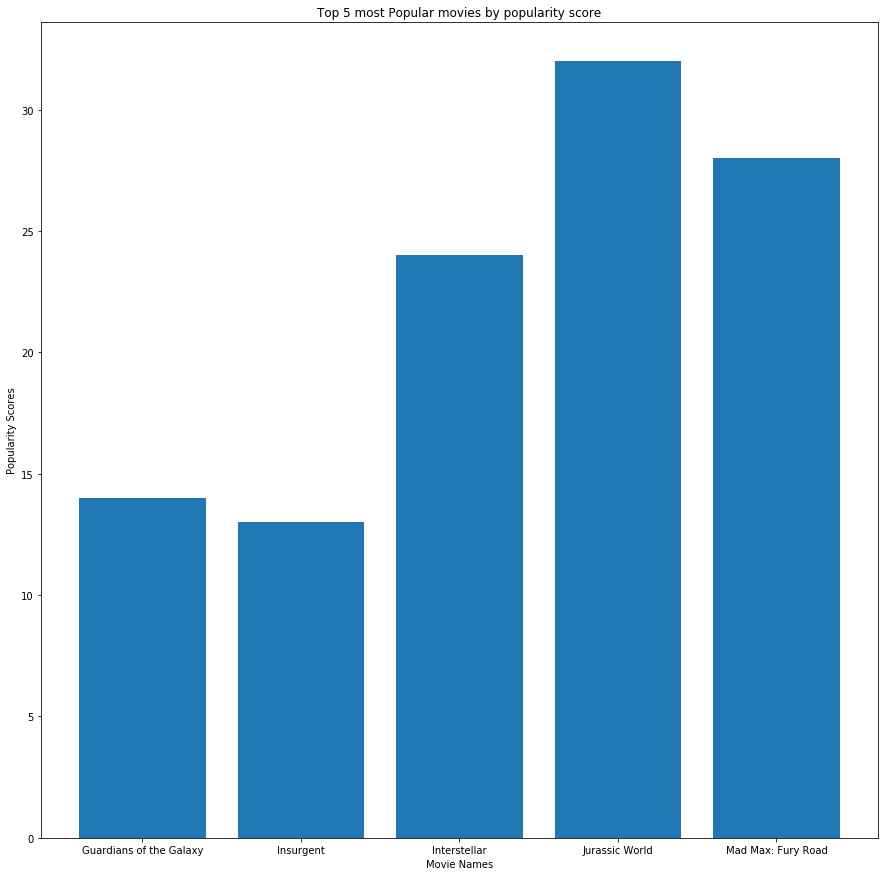

In [29]:
#Visualize most popular movies in a bar chart
plt.figure(figsize=(15,15))
plt.bar(df_q['original_title'], df_q['popularity'])
plt.title('Top 5 most Popular movies by popularity score');
plt.xlabel('Movie Names');
plt.ylabel('Popularity Scores');

>The figure above shows that the most popular movie by popularity score is Jurassic world, followed by Mad Max: Fury Road and then Interstellar

### Research Question 3  (Have the number of movies made in a decade increased?)


In [55]:
df.isnull().sum()

popularity        0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
Decades           0
dtype: int64

In [33]:
df['Decades'].value_counts()

2010's    3593
2000's    3556
1990's    1763
1980's    1062
1970's     506
1960's     299
Name: Decades, dtype: int64

In [66]:
#Create a pie chart visualising the count of movies per decade
def pie_chart():  
    return plt.pie(df['Decades'].value_counts());

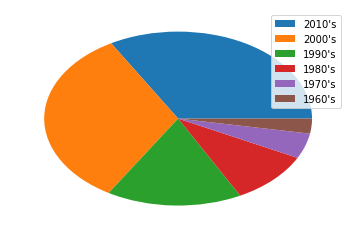

In [67]:
pie_chart();
labels = ["2010's", "2000's", "1990's", "1980's", "1970's", "1960's"]
plt.legend(labels);

>The Figure above shows the number of movies being made has increased significantly every decade

<a id='conclusions'></a>
## Conclusions

>The following conclusions have been made based on the exploration of the dataset
>1. Movie budgets generally increase overtime even after being adjusted for inflation
>2. While the budgets increase, the revenue made from movies also increases 
>3. The number of movies being made has increased significantly each decade, seeing spikes of over 500 movies on three separate occassions. The number of movies made in the 2010's alone was more than the previous three decades combined 


### Limitations
> A large amount of movies made in the 1960's and 1970's are not on official IMDB records and this could affect some of the conclusions we have reached, especially the third question which covers the number of movied being made per decade

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0